In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import statsmodels.api as sms
import numpy as np
import scipy.stats as sps

In [51]:
# Load the data into data frames
df=pd.read_csv("report.csv")

/opt/conda/envs/sds2020/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [31]:
df

,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,...,2021-03-05,2021-03-06,2021-03-07,2021-03-08,2021-03-09,2021-03-10,2021-03-11,2021-03-12,2021-03-13,2021-03-14
0,country/region,Albania,driving,NaN,NaN,NaN,100.0,95.30,101.43,97.20,...,112.26,135.22,138.92,113.62,107.81,107.39,105.48,NaN,126.15,140.06
1,country/region,Albania,walking,NaN,NaN,NaN,100.0,100.68,98.93,98.46,...,146.10,152.45,138.08,138.76,140.85,133.05,140.55,NaN,134.41,126.61
2,country/region,Argentina,driving,NaN,NaN,NaN,100.0,97.07,102.45,111.21,...,112.55,124.87,82.33,77.20,81.58,83.50,88.26,NaN,123.02,74.72
3,country/region,Argentina,walking,NaN,NaN,NaN,100.0,95.11,101.37,112.67,...,95.97,91.37,54.75,73.58,77.80,78.09,80.03,NaN,91.41,51.49
4,country/region,Australia,driving,AU,NaN,NaN,100.0,102.98,104.21,108.63,...,126.19,103.95,103.52,106.76,111.54,113.89,122.29,NaN,98.87,102.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4686,county,York County,walking,NaN,Pennsylvania,United States,100.0,110.22,121.82,109.72,...,199.23,196.19,161.88,169.23,184.03,193.43,200.11,NaN,210.17,178.29
4687,county,Young County,driving,NaN,Texas,United States,100.0,98.85,97.76,92.21,...,195.12,174.86,136.86,157.11,195.66,156.37,170.93,NaN,177.51,147.09
4688,county,Yuba County,driving,NaN,California,United States,100.0,102.98,103.10,114.08,...,147.29,148.37,149.66,126.27,120.26,116.38,127.68,NaN,151.11,120.85
4689,county,Yuma County,driving,NaN,Arizona,United States,100.0,101.82,106.67,108.93,...,163.47,152.05,125.98,128.25,128.16,131.15,141.01,NaN,163.37,142.95


In [52]:
# clean data
df=df.rename(columns={'sub_region_1':'sub1','sub_region_2':'sub2','retail_and_recreation_percent_change_from_baseline':'retail','grocery_and_pharmacy_percent_change_from_baseline':'grocery','parks_percent_change_from_baseline':'parks','transit_stations_percent_change_from_baseline':'transit','workplaces_percent_change_from_baseline':'work','residential_percent_change_from_baseline':'residential'})
df.drop(df[((df.sub1.isna()))].index, axis=0, inplace=True)
df.drop(columns=['sub2','metro_area'], inplace=True)
#select london data
dfld=df[df['sub1'].isin(["Greater London"])]
dfld=dfld.drop(columns=['country_region_code','country_region','sub1','iso_3166_2_code','census_fips_code','place_id'], inplace=True)

,country_region_code,country_region,sub1,iso_3166_2_code,census_fips_code,place_id,date,retail,grocery,parks,transit,work,residential
392,GB,United Kingdom,Aberdeen City,GB-ABE,NaN,ChIJs6qVe2kRhEgRkLBCBhpoDAM,2020-02-15,-3.0,-4.0,-32.0,-4.0,-1.0,2.0
393,GB,United Kingdom,Aberdeen City,GB-ABE,NaN,ChIJs6qVe2kRhEgRkLBCBhpoDAM,2020-02-16,6.0,0.0,-13.0,4.0,2.0,-1.0
394,GB,United Kingdom,Aberdeen City,GB-ABE,NaN,ChIJs6qVe2kRhEgRkLBCBhpoDAM,2020-02-17,11.0,0.0,24.0,2.0,-10.0,1.0
395,GB,United Kingdom,Aberdeen City,GB-ABE,NaN,ChIJs6qVe2kRhEgRkLBCBhpoDAM,2020-02-18,5.0,0.0,26.0,1.0,-6.0,1.0
396,GB,United Kingdom,Aberdeen City,GB-ABE,NaN,ChIJs6qVe2kRhEgRkLBCBhpoDAM,2020-02-19,2.0,-2.0,9.0,4.0,-6.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
163062,GB,United Kingdom,York,GB-YOR,NaN,ChIJh-IigLwxeUgRAKFv7Z75DAM,2021-03-08,-54.0,-10.0,-25.0,-64.0,-51.0,18.0
163063,GB,United Kingdom,York,GB-YOR,NaN,ChIJh-IigLwxeUgRAKFv7Z75DAM,2021-03-09,-52.0,-7.0,4.0,-64.0,-50.0,17.0
163064,GB,United Kingdom,York,GB-YOR,NaN,ChIJh-IigLwxeUgRAKFv7Z75DAM,2021-03-10,-58.0,-11.0,-41.0,-66.0,-51.0,19.0
163065,GB,United Kingdom,York,GB-YOR,NaN,ChIJh-IigLwxeUgRAKFv7Z75DAM,2021-03-11,-55.0,-4.0,-31.0,-66.0,-50.0,19.0


In [81]:
dfld

,date,retail,grocery,parks,transit,work,residential
44337,2020-02-15,-11.0,-8.0,-34.0,-10.0,-3.0,2.0
44338,2020-02-16,-9.0,-11.0,-41.0,-9.0,-4.0,1.0
44339,2020-02-17,11.0,4.0,28.0,-3.0,-13.0,2.0
44340,2020-02-18,4.0,-2.0,11.0,-4.0,-13.0,2.0
44341,2020-02-19,3.0,-3.0,3.0,-5.0,-13.0,3.0
...,...,...,...,...,...,...,...
57660,2021-03-08,-60.0,-14.0,NaN,-57.0,-57.0,21.0
57661,2021-03-09,-59.0,-15.0,NaN,-55.0,-57.0,21.0
57662,2021-03-10,-67.0,-22.0,18.0,-60.0,-56.0,23.0
57663,2021-03-11,-65.0,-15.0,NaN,-57.0,-56.0,23.0


In [102]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


In [ ]:
dfld=dfld.reset_index(drop=True)
dfld.set_index(["date"], inplace=True)

<AxesSubplot:title={'center':'The mobility movement changes as lockdown restrictions are lifted'}, xlabel='date'>

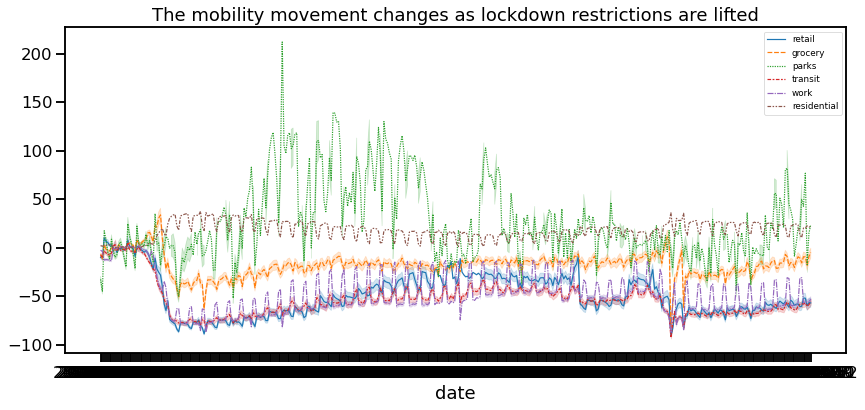

In [105]:
plt.figure(figsize=(14,6))

# Add title
plt.title("The mobility movement changes as lockdown restrictions are lifted")

sns.set_context("paper")
# Line chart showing daily global streams of each song 
sns.lineplot(data=d3ld)